In [1]:
import mne
import sklearn
import glob

In [2]:
paths = glob.glob("../data/derivatives/*/eeg/*.set")

print("Number of subjects: ", len(paths))

Number of subjects:  88


In [26]:
eeg = mne.io.read_raw_eeglab(paths[0], preload=True)
eeg

<RawEEGLAB | sub-067_task-eyesclosed_eeg.set, 19 x 321550 (643.1 s), ~46.6 MB, data loaded>

In [27]:
pprint(eeg)

Pretty printing has been turned OFF


In [30]:
print(eeg.info)

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>


#### power spectral density (PSD)

Effective window size : 4.096 (s)


/home/zaman/anaconda3/envs/eeg/lib/python3.8/site-packages/mne/viz/utils.py:161: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


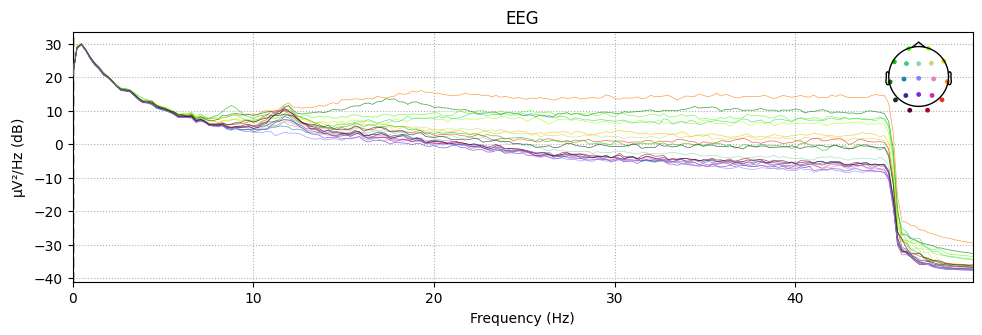

In [31]:
eeg.compute_psd(fmax=50).plot(picks="data", exclude="bads")

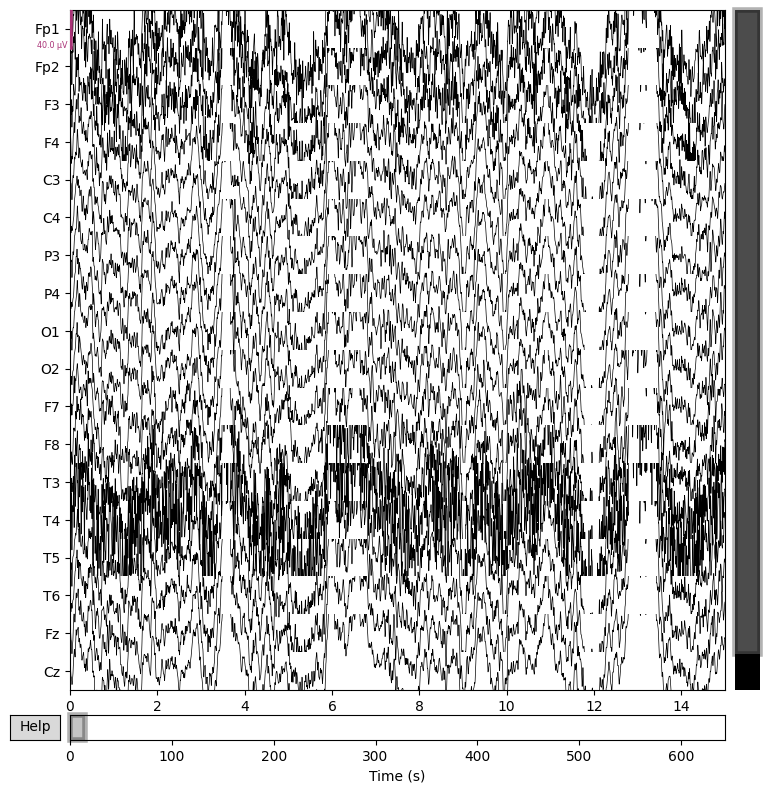

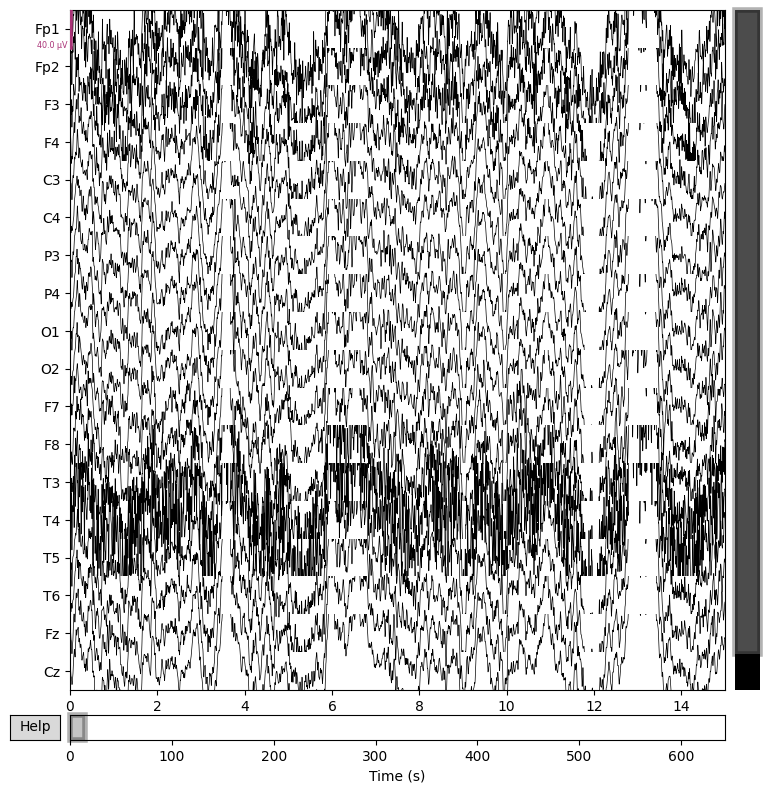

In [34]:
eeg.plot(duration=15, n_channels=-1)

In [5]:
eeg.filter(1, 20)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 20 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 20.00 Hz
- Upper transition bandwidth: 5.00 Hz (-6 dB cutoff frequency: 22.50 Hz)
- Filter length: 1651 samples (3.302 s)



<RawEEGLAB | sub-067_task-eyesclosed_eeg.set, 19 x 321550 (643.1 s), ~46.6 MB, data loaded>

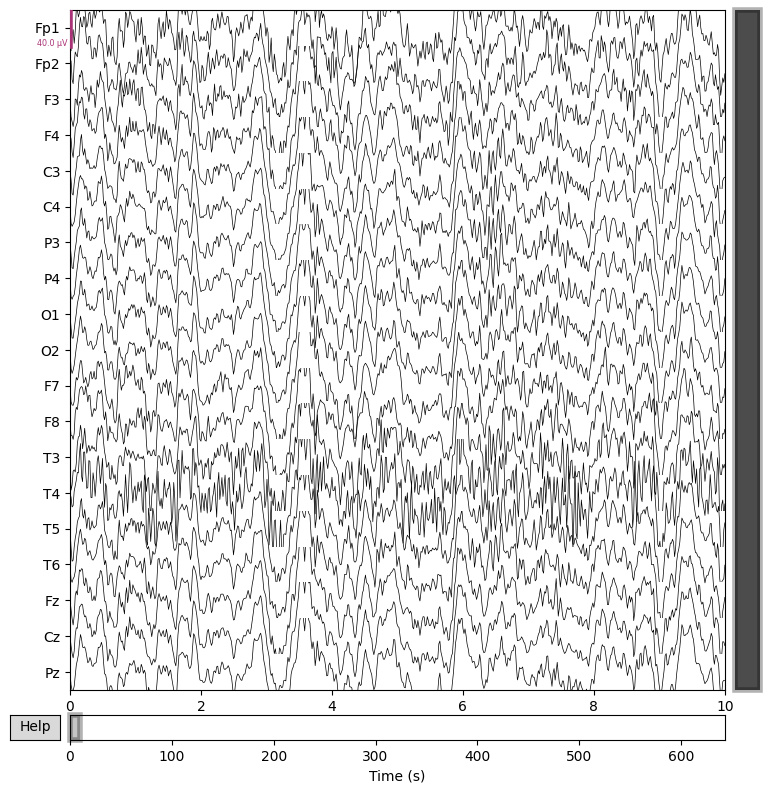

In [8]:
eeg.plot();

In [22]:
ica = mne.preprocessing.ICA(n_components=18, random_state=0)
ica.fit(eeg.copy().filter(1, 40))

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 1651 samples (3.302 s)

Fitting ICA to data using 19 channels (please be patient, this may take a while)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


Selecting by number: 18 components
Fitting ICA took 30.3s.


Method,fastica
Fit,40 iterations on raw data (321550 samples)
ICA components,18
Available PCA components,19
Channel types,eeg
ICA components marked for exclusion,—


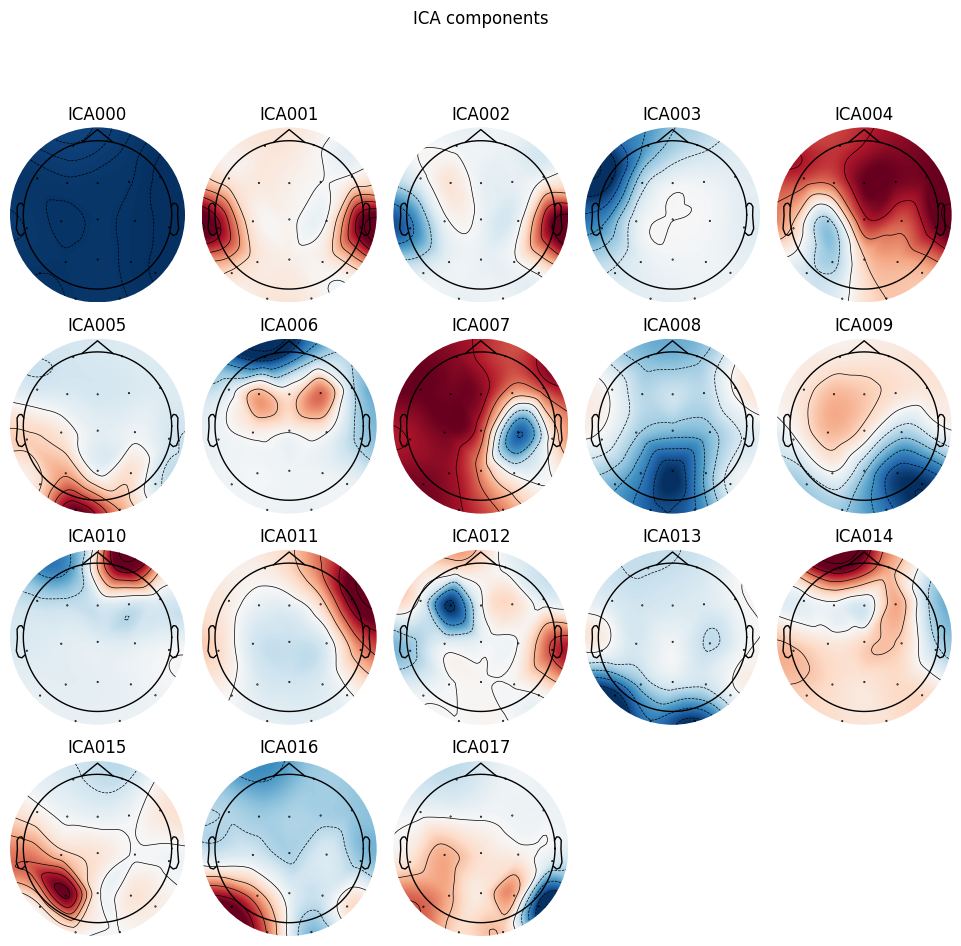

In [23]:
ica.plot_components(outlines="head");

In [24]:
ica.exclude = [10]

Automatically finding bad ICA components

In [33]:
# the below code means: find those channels that are higher that 
# reference channel `SO2` by  `threshold` standard deviation
bad_idx, scores = ica.find_bads_eog(eeg, "Cz", threshold=2)
print(bad_idx)

Using EOG channel: Cz
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 5000 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.3s


[0]


Applying ICA to Raw instance
    Transforming to ICA space (18 components)
    Zeroing out 1 ICA component
    Projecting back using 19 PCA components


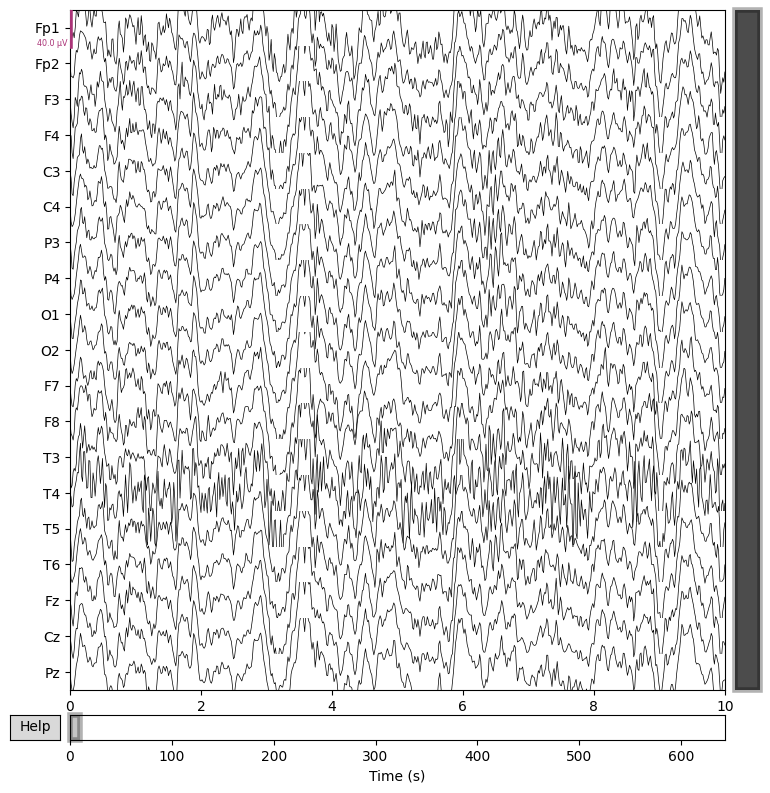

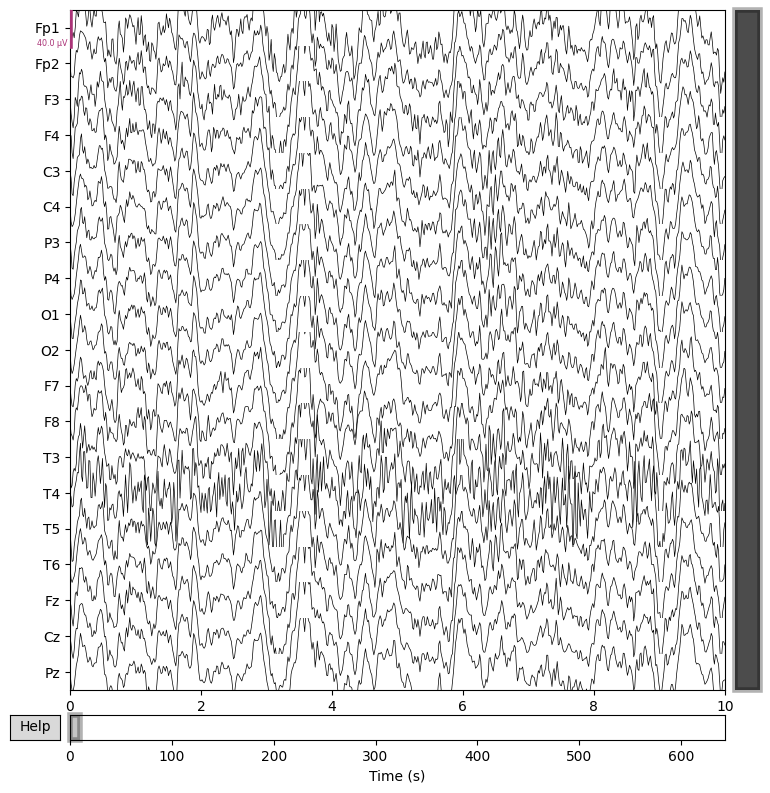

In [34]:
ica.apply(eeg.copy(), exclude=ica.exclude).plot()

#### Finding events

In [4]:
events = mne.find_events(eeg)

ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

In [7]:
eeg.annotations 

<Annotations | 0 segments>

In [5]:
help(eeg)

Help on RawEEGLAB in module mne.io.eeglab.eeglab object:

class RawEEGLAB(mne.io.base.BaseRaw)
 |  RawEEGLAB(input_fname, eog=(), preload=False, *, uint16_codec=None, montage_units='mm', verbose=None)
 |  
 |  Raw object from EEGLAB .set file.
 |  
 |  Parameters
 |  ----------
 |  input_fname : path-like
 |      Path to the ``.set`` file. If the data is stored in a separate ``.fdt``
 |      file, it is expected to be in the same folder as the ``.set`` file.
 |  eog : list | tuple | 'auto'
 |      Names or indices of channels that should be designated EOG channels.
 |      If 'auto', the channel names containing ``EOG`` or ``EYE`` are used.
 |      Defaults to empty tuple.
 |  
 |  preload : bool or str (default False)
 |      Preload data into memory for data manipulation and faster indexing.
 |      If True, the data will be preloaded into memory (fast, requires
 |      large amount of memory). If preload is a string, preload is the
 |      file name of a memory-mapped file which is 

In [6]:
eeg.get_data()

array([[ 1.80991096e-05,  1.73748741e-05,  1.64316235e-05, ...,
        -1.52819958e-05, -1.29278145e-05, -6.65529585e-06],
       [ 2.04940128e-05,  2.54975166e-05,  2.91618290e-05, ...,
         2.35725498e-05,  1.45356035e-05,  6.73872662e-06],
       [ 1.86791248e-05,  1.90726357e-05,  1.79573689e-05, ...,
         2.48914223e-05,  2.71069508e-05,  2.65645027e-05],
       ...,
       [ 8.88357353e-06,  9.08065987e-06,  8.95373535e-06, ...,
         2.06474972e-05,  1.75039692e-05,  1.45003881e-05],
       [ 1.19884710e-05,  1.19515190e-05,  1.16833992e-05, ...,
         1.71310329e-05,  1.51089191e-05,  1.33781061e-05],
       [ 1.09186153e-05,  1.13067045e-05,  1.10555820e-05, ...,
         1.35467300e-05,  1.09228020e-05,  9.00422478e-06]])

In [7]:
eeg.get_data().shape

(19, 321550)

In [23]:
dir(eeg)

['__class__',
 '__contains__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_annotations',
 '_cals',
 '_check_bad_segment',
 '_comp',
 '_cropped_samp',
 '_data',
 '_dtype',
 '_dtype_',
 '_extra_attributes',
 '_filenames',
 '_first_samps',
 '_first_time',
 '_get_buffer_size',
 '_get_channel_positions',
 '_getitem',
 '_handle_tmin_tmax',
 '_init_kwargs',
 '_last_samps',
 '_last_time',
 '_orig_units',
 '_parse_get_set_params',
 '_pick_drop_channels',
 '_pick_projs',
 '_preload_data',
 '_projector',
 '_projectors',
 '_raw_extras',
 '_raw_lengths',
 '_read_comp_grade',
 '_read_picks',
 '_read_segment',

In [10]:
eeg.average()

AttributeError: 'RawEEGLAB' object has no attribute 'average'

In [13]:
eeg.info["ch_names"]

['Fp1',
 'Fp2',
 'F3',
 'F4',
 'C3',
 'C4',
 'P3',
 'P4',
 'O1',
 'O2',
 'F7',
 'F8',
 'T3',
 'T4',
 'T5',
 'T6',
 'Fz',
 'Cz',
 'Pz']

In [24]:
eeg.plot_joint();

AttributeError: 'RawEEGLAB' object has no attribute 'plot_joint'